# Homework 2 - Phys 434
## Andrew Spicciati
## 10/14/21

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

### 1)
A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?

### Ans:
Rolling sevens is more likely. This is because there is only 1 way to roll snake eyes -- rolling a 1 on both dice. While there are 6 ways of rolling sevens (1 + 6, 2 + 5, 3 + 4, 4 + 3, 5 + 2, 6 + 1). This corresponds to 1/36 probability for snake eyes, and 6/36 probability for sevens.

### 2) 
Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).

---
#### Analytically:
There are 36 total ways to roll two die. This is because there are 6 ways to roll each and P(A and B) = P(A)P(B)

x - P(x)

2 - 1/36 (1+1)

3 - 2/36 (1+2, 2+1)

4 - 3/36 (1+3, 2+2, 3+1)

5 - 4/36 (1+4, 2+3, 3+2, 4+1)

6 - 5/36 (1+5, 2+4, 3+3, 4+2, 5+1)

7 - 6/36 (1+6, 2+5, 3+4, 4+3, 5+2,6+1)

8 - 5/36 (2+6, 3+5, 4+4, 5+3, 6+2)

and so on back down to

12 - 1/36 (6+6)

---

#### Numerically:

In [2]:
dice = [1/6 for a in range(6)]

In [3]:
convolution = np.convolve(dice,dice,mode='full')

In [4]:
sum(convolution)

1.0000000000000002

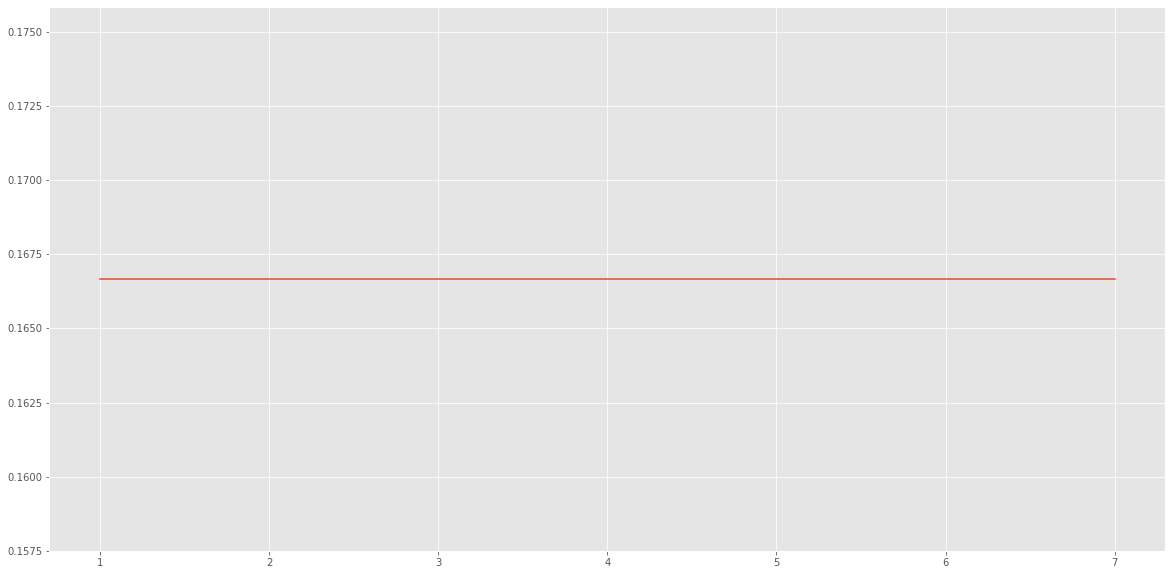

In [17]:
plt.step(np.linspace(1,7,6),dice,where='mid')

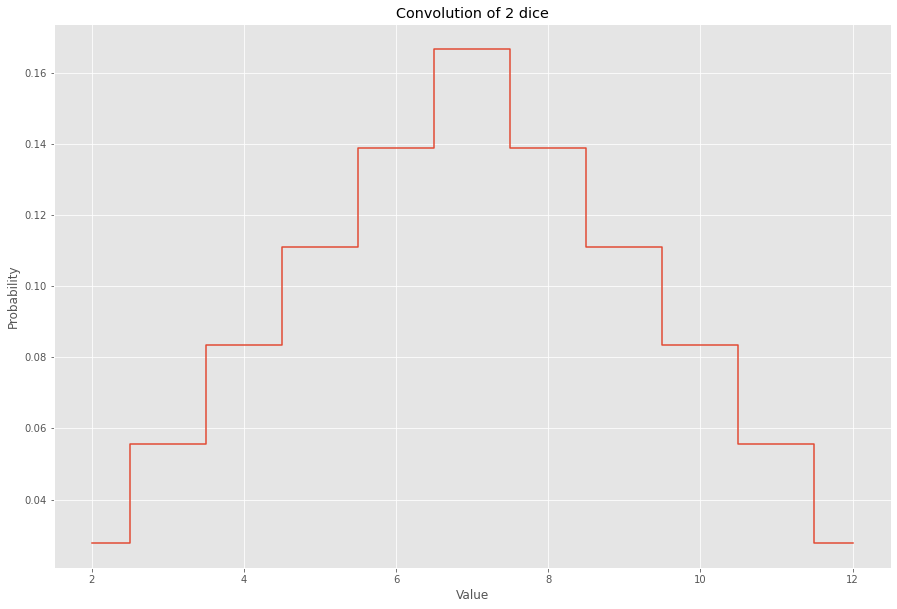

In [5]:
plt.style.use('ggplot')

plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 10)

x = np.linspace(2,12,11)
plt.step(x,convolution,where='mid')

ax.set_xlabel('Value',fontsize='large')
ax.set_ylabel('Probability',fontsize='large')
ax.set_title('Convolution of 2 dice');

### 3) 
Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.



In [6]:
mean = 0
for a in range(len(x)):
    mean += convolution[a] * x[a]
    
mean

7.0

For variance:
 
$$ \large{\sigma^2 = {\sum_{n=i}^{N}(x_i - \bar{x})* p(x_i)}}$$

In [7]:
variance = 0
for a in range(len(x)):
    variance += (x[a] - mean)**2 * convolution[a]

variance

5.833333333333334

### 4) 
Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.



In [8]:
repetitions = 10
dice = [1/6 for a in range(6)]

for a in range(repetitions-1):
    if a == 0:
        convolution2 = np.convolve(dice,dice)
    else:
        convolution2 = np.convolve(dice,convolution2)

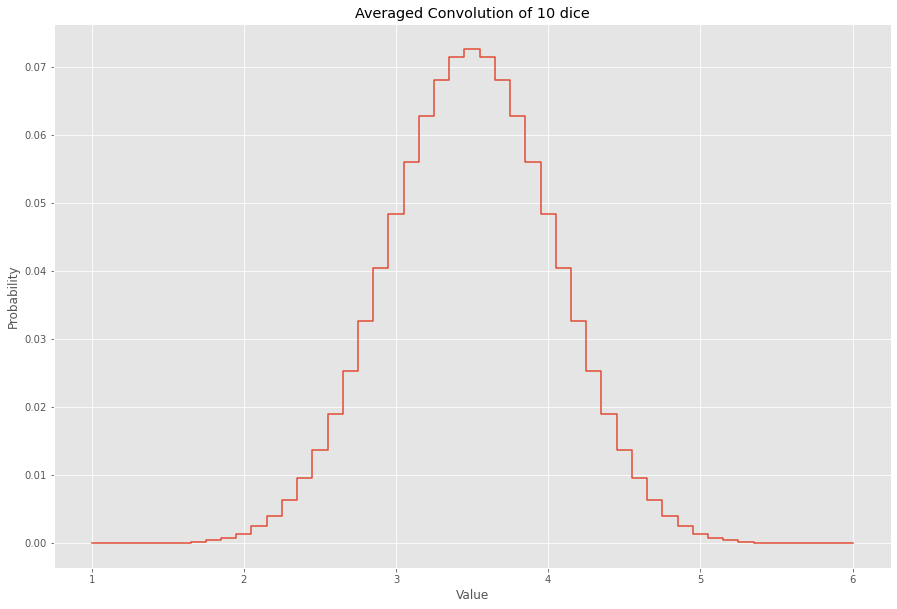

In [9]:
plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 10)

ax.set_xlabel('Value',fontsize='large')
ax.set_ylabel('Probability',fontsize='large')
ax.set_title('Averaged Convolution of 10 dice')

x = np.linspace(10,60,51)
plt.step(x/10,convolution2,where='mid');

### 5) 
Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time.

In [10]:
def summing_gaussians(mean1,mean2,std1,std2,low_bound = -10, avg=False):
    
    x = np.linspace(low_bound,-low_bound,200)
    x2 = np.linspace(2*low_bound,-2*low_bound,399)

    gaussian1 = stats.norm.pdf(x=x,loc=mean1, scale = std1)
    gaussian2 = stats.norm.pdf(x=x,loc=mean2, scale = std2)
        
    sum_gaussian = np.convolve(gaussian1,gaussian2)/99

    plt.rcParams["figure.figsize"] = (20,10)
    fig, ax = plt.subplots(1, 3)
    plt.tick_params(labelsize = 10)
    
    ax[0].set_title(f'Mean = {mean1}, Std = {std1}')
    ax[1].set_title(f'Mean = {mean2}, Std = {std2}')
    ax[2].set_title(f'Convolution Plot')
    
    if avg:
        x2 = x2/2
        ax[2].set_title(f'Convolution Plot, Averaged')
    
    plots = [gaussian1,gaussian2,sum_gaussian]
    space = [x,x,x2]
    for idx,val in enumerate(plots):
        ax[idx].set_xlim(-10,10)
        ax[idx].set_xlabel('Value',fontsize='large')
        ax[idx].set_ylabel('Probability',fontsize='large')
        ax[idx].plot(space[idx],val)

    #ax[2].plot(x2,stats.norm.pdf(x2,0,1))
        
    plt.show()

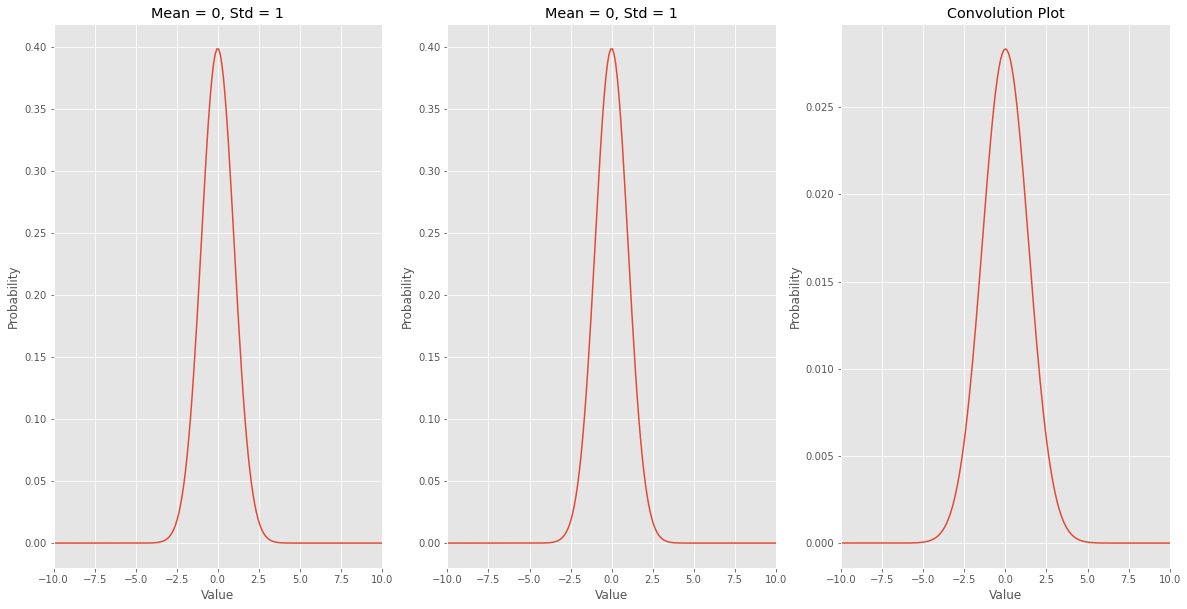

In [11]:
summing_gaussians(0,0,1,1)

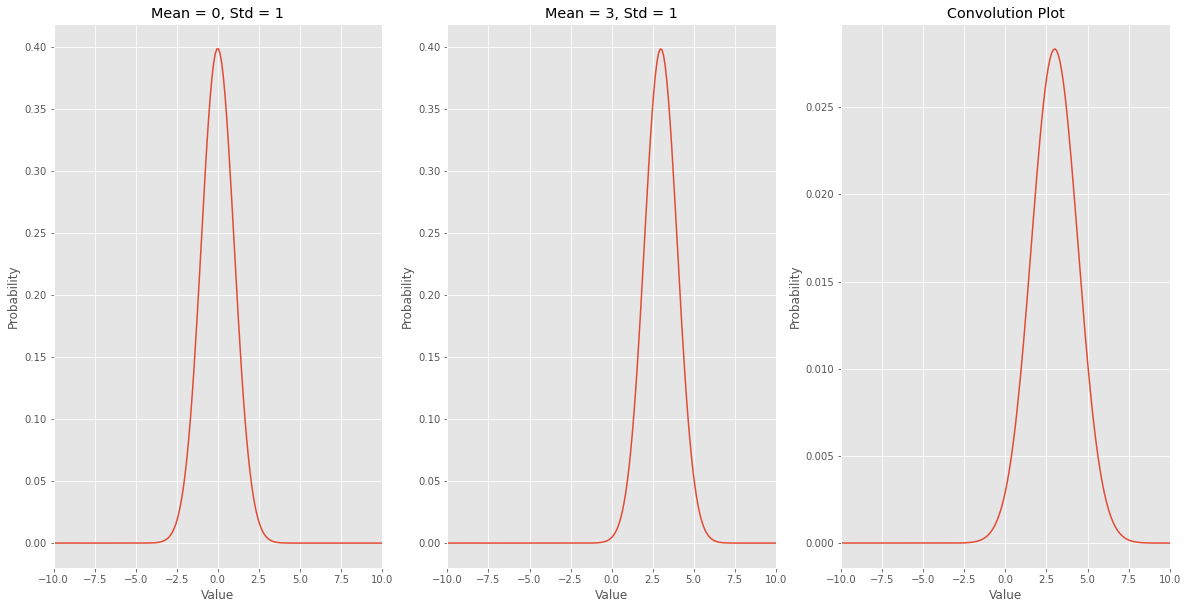

In [12]:
summing_gaussians(0,3,1,1)

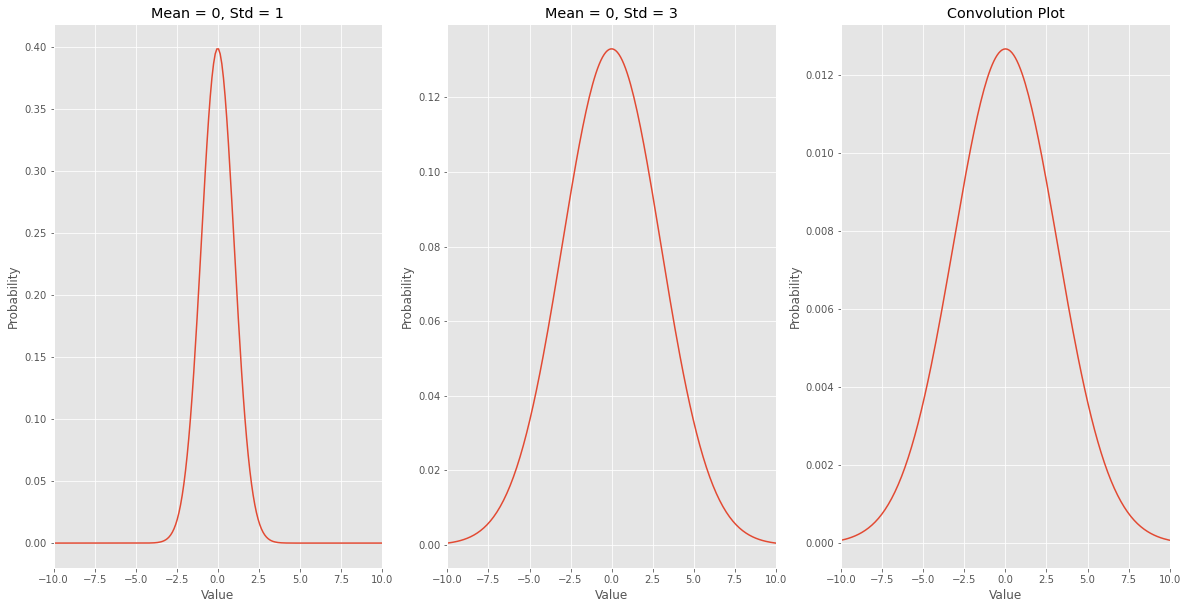

In [13]:
summing_gaussians(0,0,1,3)

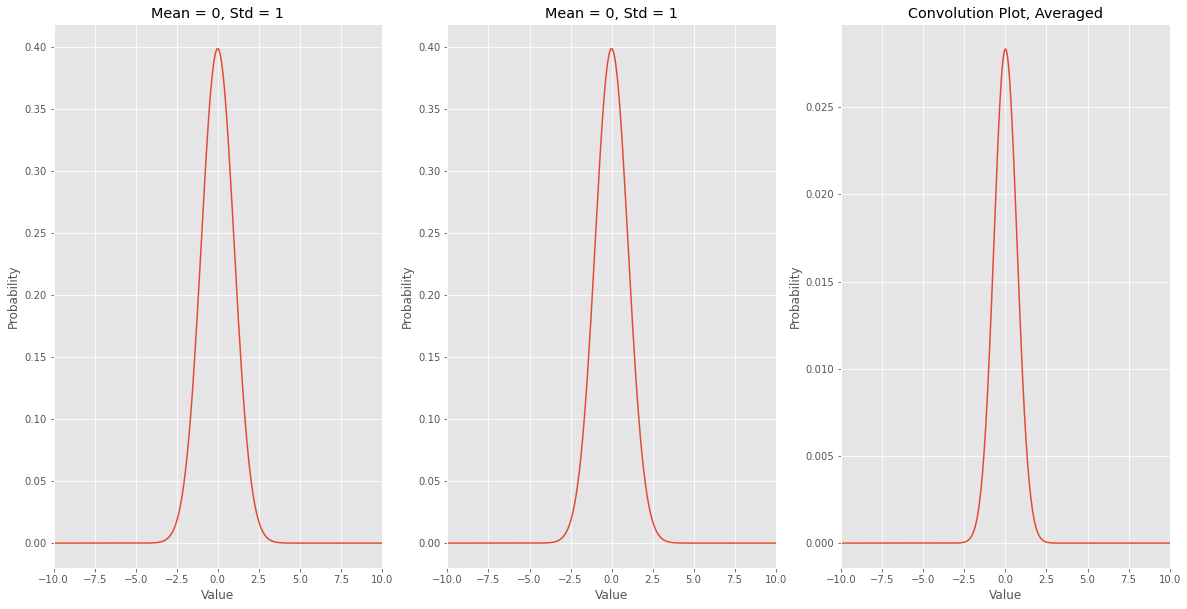

In [14]:
summing_gaussians(0,0,1,1,avg=True)

#### Analysis:

Here I have shown that when convolving two gaussian distributions with one another, the resulting PDF is also a gaussian. I showed that this is true no matter the mean and standard deviations of the gaussians I.E. they can have different means or standard deviation. When summing without averaging, the resulting plot is wider than either of the original. This makes sense, as there is a wider range of outcomes rolling 2 dice than rolling 1. When averaging the plot, it becomes narrower. This also makes sense, as the more likely values will become more heavily weighted when averaging. So the standard deviation of the summed gaussians increases, while the standard deviation of the averaged gaussians decreases. This means that when integrating a signal over time, if we take the average, the range of expected values will get smaller as more time passes and more data points are collected. Therefore, to produce a statistically significant measurement, the average would only need to vary slightly from the mean.